# 3. Analysis

## 3.2. Q1: General patterns; Q2: Frequency of news stories about heroes of special military operation

## Introduction

Propaganda frequently utilizes tales of heroic figures in order to promote a favorable perception of war. This notebook examines whether the First channel's news incorporates this method of using hero stories.

The notebook is comprised of two main sections:

1) An examination of the overall trends and patterns present in news broadcasts, and

2) An investigation to determine if hero stories are being broadcasted, and if so, with what frequency.

In [1]:
import pandas as pd
import numpy as np
import copy
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%run "3.0. Analysis_Functions.ipynb"

In [3]:
%run "0.1. Intro_Visualization style.ipynb"

## Data loading and filtering relevant rows

### Data loading

In [4]:
file = 'data/df_tokenized.csv'

In [5]:
df = pd.read_csv(file)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.shape

(359041, 18)

In [7]:
df.head(3)

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,dat,year,year_month,hour,weekday,whole newscast,body_token_final,title_token_final
0,15,2023-01-27 21:45:00,Общество,Выпуск программы «Время» в 21:00 от 27.01.2023,https://www.1tv.ru/news/2023-01-27/446104-vypu...,Смотрите в этом выпуске: 79 лет назад была пол...,Общество,2422.0,0-15,2023-01-27 21:45:00,2023-01-27,2023,2023-01,21,4,True,"['смотреть', 'выпуск', '79', 'год', 'полностью...","['выпуск', 'программа', 'время', '21:00', '27...."
1,16,2023-01-27 21:35:00,Культура,В Москве проходит церемония вручения премии «З...,https://www.1tv.ru/news/2023-01-27/446121-v_mo...,Событие в мире отечественного кино. В Москве в...,"Культура,Кино,Марина Зудина,Екатерина Климова,...",290.0,0-15,2023-01-27 21:35:00,2023-01-27,2023,2023-01,21,4,False,"['событие', 'мир', 'отечественный', 'кино', 'м...","['москва', 'проходить', 'церемония', 'вручение..."
2,20,2023-01-27 21:34:00,Спорт,В Туле появился новый футбольный манеж,https://www.1tv.ru/news/2023-01-27/446120-v_tu...,Футбольный манеж в Туле — искусственный газон ...,"Спорт,Регионы,Футбол,Алексей Дюмин,Тульская об...",48.0,0-15,2023-01-27 21:34:00,2023-01-27,2023,2023-01,21,4,False,"['футбольный', 'манеж', 'тула', 'искусственный...","['тула', 'появиться', 'новый', 'футбольный', '..."


In [8]:
df['video_duration_min'] = df['video_duration_seconds'] / 60

In [9]:
# Add column to compare news patterns before special military operation and after
# We take one year before SMO for this comparison
df['dat'] = pd.to_datetime(df['dat'])
df['before_after_CMO'] = np.where(df['dat']>=pd.to_datetime('2021-01-11'),
                                  'before CMO',
                                  np.NaN)
df['before_after_CMO'] = np.where((df['dat']>=pd.to_datetime('2022-02-24')),
                                  'after CMO',
                                  df['before_after_CMO'])

In [10]:
# Dataframe that contains only newscasts, not individual news stories
newscast = df[df['whole newscast']==True]

### Filtering rows

In [11]:
# Dataframe that contains only individual news stories, not newscasts
df = df[df['whole newscast']==False]

In [12]:
df.shape

(350719, 20)

In [13]:
# Filtering rows that are relevant for further analysis (a year before the special military operation)
df = df[df['dat']>= pd.to_datetime('2021-01-01')]

In [14]:
df.shape

(40590, 20)

## Patterns of news releases in general

In [15]:
# Calculate total new duration per day
news_duration = df.groupby('dat')[['video_duration_min']].sum()
pd.set_option('display.max_rows', None)
news_duration

,video_duration_min
dat,
2021-01-01,23.750000
2021-01-02,32.333333
2021-01-03,27.950000
2021-01-04,38.300000
2021-01-05,41.083333
2021-01-06,38.816667
2021-01-07,45.466667
2021-01-08,51.100000
2021-01-09,47.100000


In [16]:
news_duration.describe()

,video_duration_min
count,757.000000
mean,121.140555
std,40.189596
min,12.950000
25%,104.366667
50%,121.833333
75%,140.200000
max,388.633333


In [17]:
# Calculate an exponential moving average
news_duration['EMA'] = news_duration['video_duration_min'].ewm(alpha=0.15).mean()

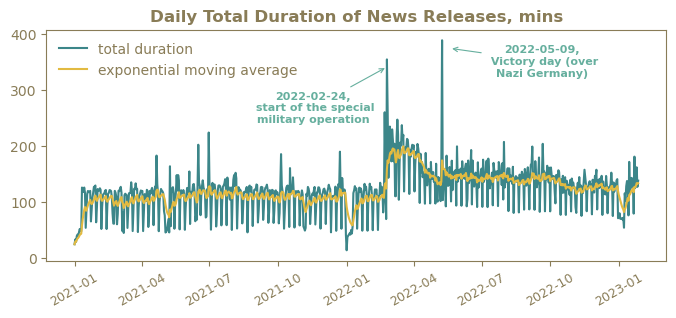

In [18]:
# Draw timeseries of daily news duration

plt.figure(figsize=(8, 3))
plt.plot(news_duration.index, news_duration['video_duration_min'], 
         c=color_1, label='total duration')
plt.plot(news_duration.index, news_duration['EMA'], 
         c=color_2, label='exponential moving average')

# Label start of special military operation
plt.annotate('2022-02-24,\n start of the special\nmilitary operation', 
             xy=(0.55, 0.84), xycoords='axes fraction', weight='bold',
             xytext=(0.43, 0.6), textcoords='axes fraction',
             fontsize=8, color=color_4, horizontalalignment='center',
             arrowprops=dict(arrowstyle='->, head_width=0.2', 
                             color=color_4, linewidth=0.8))

# Label Victory day
plt.annotate('2022-05-09,\n Victory day (over\nNazi Germany)', 
             xy=(0.65, 0.92), xycoords='axes fraction', weight='bold',
             xytext=(0.8, 0.8), textcoords='axes fraction',
             fontsize=8, color=color_4, horizontalalignment='center',
             arrowprops=dict(arrowstyle='->, head_width=0.2', 
                             color=color_4, linewidth=0.8))

plt.title('Daily Total Duration of News Releases, mins')
plt.xticks(rotation=30, size=9)
plt.yticks(size=10)
plt.legend(frameon=False);

### Cyclicity
Based on the picture, it appears that the duration of daily news follows a cyclical pattern, which could differ by the day of the week. To better understand this cyclicity, creating boxplots for each day of the week would be useful.

In [19]:
def plot_boxplot(df, plot_dim, fig_size):
    """
    Plot boxplots of duration for days of week
    Args: df - dataframe; For its columns, a probability density will be drawn;
          plot_dim - tuple, dimension of the plot
          fig_size - tuple, figure size
    """
    
    plt.figure(figsize=fig_size)
    plots_quantity = plot_dim[0] * plot_dim[1]
    
    # Add a day of week
    df['day_of_week'] = df.index.dayofweek
    
    dic = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
           3: 'Thursday', 4: 'Friday', 5: 'Saturday',
           6: 'Sunday'}
    
    data = []
    
    for plot_indx in range(plots_quantity):
        data.append(df.loc[df['day_of_week']==plot_indx, 'video_duration_min'])
    
    fig, ax = plt.subplots(figsize=fig_size)
    
    ax.set_title('Total Duration of News Releases by Day of Week, minutes', size=11)
       
    ax.boxplot(data, boxprops=dict(color=color_1), 
               capprops=dict(color=color_1), 
               whiskerprops=dict(color=color_1),
               flierprops=dict(color=color_1, markeredgecolor=color_1))   
    plt.xticks([1, 2, 3, 4, 5, 6, 7], dic.values())
    plt.xticks(rotation=30, size=9)
    plt.yticks(size=10)   

<Figure size 800x250 with 0 Axes>

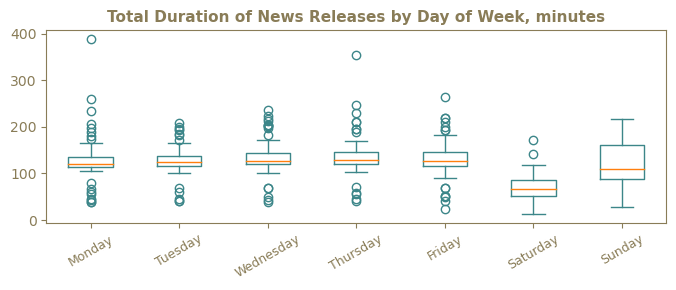

In [20]:
plot_boxplot(news_duration, (1,7), (8,2.5))

<Figure size 800x250 with 0 Axes>

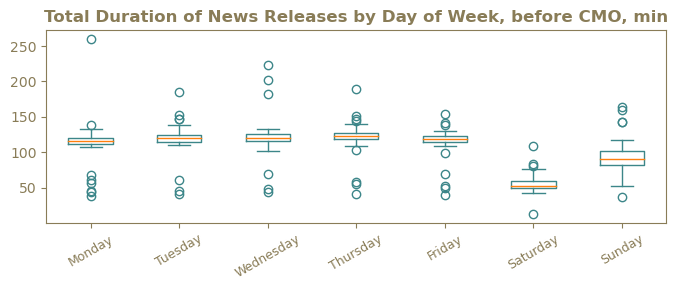

In [21]:
# Total duration of news releases by day of week before CMO
duration_before_CMO = df[df['before_after_CMO']=='before CMO'].groupby('dat')[['video_duration_min']].sum()
plot_boxplot(duration_before_CMO, (1,7), (8,2.5))
plt.title('Total Duration of News Releases by Day of Week, before CMO, min');

<Figure size 800x250 with 0 Axes>

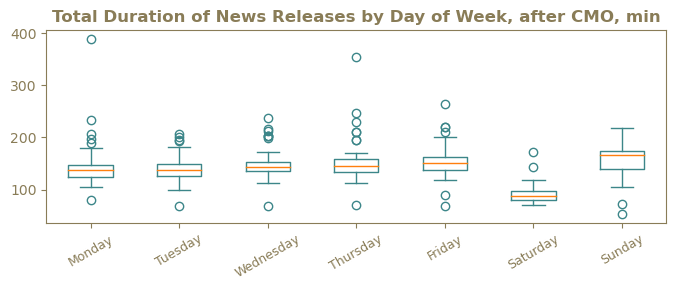

In [22]:
# Total duration of news releases by day of week after CMO
duration_after_CMO = df[df['before_after_CMO']=='after CMO'].groupby('dat')[['video_duration_min']].sum()
plot_boxplot(duration_after_CMO, (1,7), (8,2.5))
plt.title('Total Duration of News Releases by Day of Week, after CMO, min');

### Comparison of news duration before and after commencement of special military operation

In [23]:
duration_before_CMO[['video_duration_min']].describe()

,video_duration_min
count,409.000000
mean,105.941361
std,31.038865
min,12.950000
25%,89.416667
50%,115.850000
75%,122.816667
max,259.816667


In [24]:
duration_after_CMO[['video_duration_min']].describe()

,video_duration_min
count,338.000000
mean,141.955079
std,39.256238
min,53.300000
25%,125.200000
50%,140.416667
75%,157.950000
max,388.633333


The tables above reveal that the median daily news duration is higher by 25 minutes following the initiation of the special military operation compared to prior to it. It is interesting to compare the distribution of daily news duration before and after the start of the special operation.

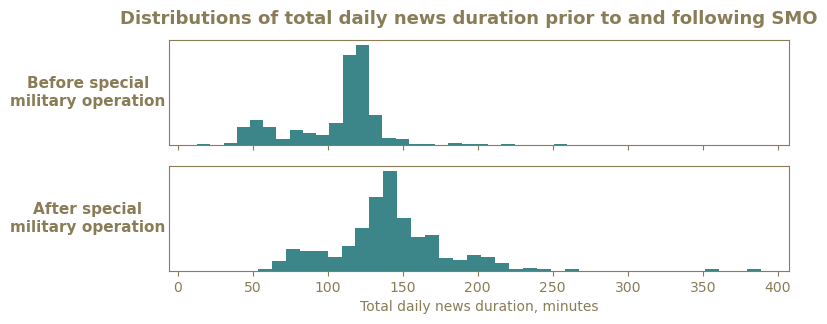

In [25]:
# Ridgeline plot
fig, ax = plt.subplots(2, 1, figsize=(8,3), sharex=True)
duration_before_CMO['video_duration_min'].hist(ax=ax[0], density = True, bins='auto', 
                        color = color_1, histtype="bar")
duration_after_CMO['video_duration_min'].hist(ax=ax[1], density = True, bins='auto', 
                         color = color_1, histtype="bar")
ax[0].grid(False)
ax[1].grid(False)
plt.suptitle('Distributions of total daily news duration prior to and following SMO', fontsize=13, weight='bold')
ax[0].set_ylabel('Before special\nmilitary operation', rotation=0, fontsize=11,
                 labelpad=55, va='center', weight='bold')
ax[1].set_ylabel('After special\nmilitary operation', rotation=0, fontsize=11,
                 labelpad=55, va='center', weight='bold')
plt.xlabel('Total daily news duration, minutes')
# Remove ticks
ax[0].set_yticks([], [])
ax[1].set_yticks([], []);

### Newscasts analysis

In [26]:
# Dataframe that contains only newscasts, not individual news stories
pd.reset_option('display.max_rows')
newscast.head(3)

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,dat,year,year_month,hour,weekday,whole newscast,body_token_final,title_token_final,video_duration_min,before_after_CMO
0,15,2023-01-27 21:45:00,Общество,Выпуск программы «Время» в 21:00 от 27.01.2023,https://www.1tv.ru/news/2023-01-27/446104-vypu...,Смотрите в этом выпуске: 79 лет назад была пол...,Общество,2422.0,0-15,2023-01-27 21:45:00,2023-01-27,2023,2023-01,21,4,True,"['смотреть', 'выпуск', '79', 'год', 'полностью...","['выпуск', 'программа', 'время', '21:00', '27....",40.366667,after CMO
16,35,2023-01-27 18:45:00,Общество,Выпуск новостей в 18:00 от 27.01.2023,https://www.1tv.ru/news/2023-01-27/446090-vypu...,Смотрите в этом выпуске: сегодня 79 лет со дня...,Общество,2391.0,0-15,2023-01-27 18:45:00,2023-01-27,2023,2023-01,18,4,True,"['смотреть', 'выпуск', 'сегодня', '79', 'год',...","['выпуск', 'новость', '18:00', '27.01.2023']",39.850000,after CMO
30,51,2023-01-27 15:15:00,Общество,Выпуск новостей в 15:00 от 27.01.2023,https://www.1tv.ru/news/2023-01-27/446082-vypu...,"Смотрите в этом выпуске: память, которая навсе...",Общество,1006.0,0-15,2023-01-27 15:15:00,2023-01-27,2023,2023-01,15,4,True,"['смотреть', 'выпуск', 'память', 'навсегда', '...","['выпуск', 'новость', '15:00', '27.01.2023']",16.766667,after CMO


In [27]:
# Newscasts before special military operation
newscast_before = newscast[newscast['before_after_CMO']=='before CMO']
newscast_before_count = newscast_before.groupby(['dat'])[['title']].count()
newscast_before_count.describe()

,title
count,409.000000
mean,4.977995
std,1.433837
min,1.000000
25%,3.000000
50%,6.000000
75%,6.000000
max,8.000000


In [28]:
# Newscasts after special military operation
newscast_after = newscast[newscast['before_after_CMO']=='after CMO']
newscast_after_count = newscast_after.groupby(['dat'])[['title']].count()
newscast_after_count.describe()

,title
count,338.000000
mean,6.710059
std,2.181379
min,3.000000
25%,5.000000
50%,7.000000
75%,7.000000
max,14.000000


Based on the tables above, we can observe that the median number of newscasts before the special military operation was 6, while after the operation, it is 7. This suggests that, on average, the number of newscasts increased by 1.

In [29]:
newscast_before.groupby('hour')['title'].count()

hour
7     270
8       3
9     273
10    132
11      2
12    394
13      4
14      1
15    273
16      1
18    270
19      6
21    338
22     69
Name: title, dtype: int64

The primary times for news broadcasting before the special military operation were 7am, 9am, 12pm, 3pm, 6pm, and 9pm.

In [30]:
newscast_after.groupby('hour')['title'].count()

hour
7      72
9     229
10    114
11     34
12    338
13    225
14    232
15    280
16     14
17     32
18    315
19     16
20     30
21    208
22    100
23     29
Name: title, dtype: int64

Following the special military operation, the primary times for news broadcasting are 9am, 12pm, 1pm, 2pm, 3pm, 6pm, and 9pm.

In [31]:
before_prime_time = [7, 9, 12, 15, 18, 21]
newscast_before_h = newscast_before.groupby(['dat', 'hour'])[['video_duration_min']].sum()
newscast_before_h.reset_index(inplace=True)
newscast_before_h[newscast_before_h['hour'].isin(before_prime_time)].groupby('hour').median()

,video_duration_min
hour,
7,5.950000
9,25.050000
12,15.308333
15,15.016667
18,39.425000
21,34.741667


In [32]:
after_prime_time = [9, 12, 13, 14, 15, 18, 21]
newscast_after_h = newscast_after.groupby(['dat', 'hour'])[['video_duration_min']].sum()
newscast_after_h.reset_index(inplace=True)
newscast_after_h[newscast_after_h['hour'].isin(after_prime_time)].groupby('hour').median()

,video_duration_min
hour,
9,21.750000
12,15.533333
13,15.533333
14,15.250000
15,15.775000
18,24.200000
21,44.416667


It appears that the First channel implemented the following changes after the start of the special military operation: 1) added one newscast, 2) extended the 9pm newscast, which is accessible to working citizens, and 3) shortened the 6pm newscast, which is not accessible to working citizens (as the workday in Russia typically ends at 6pm).

## Frequency of news stories about heroes of special military operation

### Marking the rows of interest with the tag 'Special military operation' and phrases about bravery and heroism

In [33]:
 words_to_find = [
     'героизм', 'геройств', 'героич', 
     'герой', 'героя', 'герою', 'герои', 'героев', 'героем', 'героям',
     'доблест', 'самопожертвован', 'самоотвержен',
     'храбр', 'неустрашим', 
     'мужеств', 'отваг', 'отваж',
     'смелост', 'смелы', 'смело', 'смелая', 'смельчак',
     'подвиг', 'наград', 'орден']
    
token_dict = {'body_token_final':  words_to_find,
              'title_token_final':  words_to_find}                  

In [34]:
# Find news stories about heroes and heroism
df = find_tokens(df, token_dict)

In [35]:
# Find news about Special Military Operation
df['SMO'] = df['tags_bottom'].str.contains('Специальная военная операция|Вооруженные силы')

In [36]:
# Find news about heroes of Special Military Operation
df['heroes_of_SMO'] = df['SMO'] * df['contain_token']

In [37]:
df_SMO = df[(df['SMO']==1)&(df['dat']>=pd.to_datetime('2022-02-24'))]

### What is the frequency of news coverage on the First channel regarding heroes of special military operations?

In [38]:
df_SMO[df_SMO['heroes_of_SMO']==1]

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,...,whole newscast,body_token_final,title_token_final,video_duration_min,before_after_CMO,body_token_final_contain,title_token_final_contain,contain_token,SMO,heroes_of_SMO
11,40,2023-01-27 21:19:00,Общество,Минобороны РФ сообщило новые имена героев — уч...,https://www.1tv.ru/news/2023-01-27/446114-mino...,И еще о стойкости наших героев. Ефрейтор Матве...,"Общество,Вооруженные силы",25.0,0-15,2023-01-27 21:19:00,...,False,"['стойкость', 'герой', 'ефрейтор', 'матвей', '...","['минобороны', 'рф', 'сообщить', 'новый', 'имя...",0.416667,after CMO,1,1,1,True,1
24,28,2023-01-27 18:20:00,Общество,Российские военные действуют доблестно и отваж...,https://www.1tv.ru/news/2023-01-27/446095-ross...,"Ефрейтор Матвей Орлов, командир боевой машины,...","Общество,Вооруженные силы",34.0,0-15,2023-01-27 18:20:00,...,False,"['ефрейтор', 'матвей', 'орлов', 'командир', 'б...","['российский', 'военный', 'действовать', 'добл...",0.566667,after CMO,0,1,1,True,1
76,95,2023-01-26 21:13:00,Общество,О новых подвигах участников спецоперации расск...,https://www.1tv.ru/news/2023-01-26/446049-o_no...,И еще о наших защитниках.Группа гвардии старше...,"Общество,Вооруженные силы",27.0,0-15,2023-01-26 21:13:00,...,False,"['защитниках', 'группа', 'гвардия', 'старший',...","['новый', 'подвиг', 'участник', 'спецоперация'...",0.450000,after CMO,0,1,1,True,1
116,132,2023-01-26 12:04:00,В мире,Российские военные в зоне спецоперации действу...,https://www.1tv.ru/news/2023-01-26/445993-ross...,Группа гвардии старшего лейтенанта Амира Шахба...,"В мире,Специальная военная операция на Украине",38.0,0-15,2023-01-26 12:04:00,...,False,"['группа', 'гвардия', 'старший', 'лейтенант', ...","['российский', 'военный', 'зона', 'спецопераци...",0.633333,after CMO,0,1,1,True,1
137,159,2023-01-25 21:38:00,"Политика,Общество","Глава Подмосковья встретился со школьниками, к...",https://www.1tv.ru/news/2023-01-25/445973-glav...,Поддержка семей военнослужащих. Социальные про...,"Политика,Общество,Регионы,Специальная военная ...",70.0,0-15,2023-01-25 21:38:00,...,False,"['поддержка', 'семья', 'военнослужащий', 'соци...","['глава', 'подмосковье', 'встретиться', 'школь...",1.166667,after CMO,1,0,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23245,7887,2022-02-26 12:00:00,В мире,"Более 80 украинских военнослужащих, сложивших ...",https://www.1tv.ru/news/2022-02-26/421880-bole...,"82 украинских военнослужащих, добровольно слож...","В мире,Конфликты,Специальная военная операция ...",225.0,15-30,2022-02-26 12:00:00,...,False,"['82', 'украинских', 'военнослужащий', 'добров...","['80', 'украинских', 'военнослужащий', 'сложив...",3.750000,after CMO,1,0,1,True,1
23252,7880,2022-02-26 10:02:00,В мире,В Севастополь с острова Змеиный доставили укра...,https://www.1tv.ru/news/2022-02-26/421873-v_se...,В числе украинских военнослужащих те самые пог...,"В мире,Конфликты,Специальная военная операция ...",182.0,15-30,2022-02-26 10:02:00,...,False,"['число', 'украинских', 'военнослужащий', 'сам...","['севастополь', 'остров', 'змеиный', 'доставит...",3.033333,after CMO,1,0,1,True,1
23282,7909,2022-02-25 21:03:00,"Политика,В мире",Взять власть в свои руки призвал украинских во...,https://www.1tv.ru/news/2022-02-25/421838-vzya...,Бандеровцы и неонацисты действуют террористиче...,"Политика,В мире,Специальная военная операция н...",170.0,15-30,2022-02-25 21:03:00,...,False,"['бандеровец', 'неонацист', 'действовать', 'те...","['взять', 'власть', 'рука', 'призвать', 'украи...",2.833333,after CMO,1,0,1,True,1
23288,14632,2022-02-25 19:56:00,"Политика,В мире",Президент сделал заявление по поводу спецопера...,https://www.1tv.ru/news/2022-02-25/421832-prez...,Бандеровцы и неонацисты прячут тяжелое вооруже...,"В мире,Конфликты,Специальная военная операция ...",176.0,15-30,2022-02-25 19:56:00,...,False,"['бандеровец', 'неонацист', 'прятать', 'тяжёлы...","['президент', '

In [39]:
# Number of news stories per day about heroes of SMO
heroes_number = df_SMO.groupby('dat')[['heroes_of_SMO']].sum()
heroes_number

,heroes_of_SMO
dat,
2022-02-24,0
2022-02-25,3
2022-02-26,6
2022-02-27,8
2022-02-28,4
...,...
2023-01-23,5
2023-01-24,4
2023-01-25,5


In [40]:
# Number of days without mentioning heroes
heroes_number[heroes_number['heroes_of_SMO']==0]

,heroes_of_SMO
dat,
2022-02-24,0
2022-10-27,0
2022-11-06,0
2022-11-20,0
2023-01-01,0


After the special military operation began, the First Channel started airing news stories about the heroes of the operation on a daily basis. There were only five days of the operation when no such stories were aired.

In [41]:
heroes_number.describe()

,heroes_of_SMO
count,338.000000
mean,4.582840
std,2.901028
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,17.000000


The First Channel typically broadcasts an average of 4 stories about the heroes of the special military operation. Approximately 50% of the time, the number of stories broadcasted falls within the range of 2 to 6 per day.

### What is the daily duration of news coverage on the First channel regarding heroes of special military operations?

In [42]:
heroes_duration = df_SMO[df_SMO['heroes_of_SMO']==1].groupby('dat')[['video_duration_min']].sum()
heroes_duration.describe()

,video_duration_min
count,333.000000
mean,9.464665
std,9.876329
min,0.450000
25%,2.166667
50%,6.050000
75%,13.100000
max,62.483333


On average, the First Channel broadcasts 6 minutes of coverage about the heroes of the special military operation. Approximately 50% of the time, the duration of the stories falls within the range of 2 to 13 minutes per day.